<a href="https://colab.research.google.com/github/alessandrossC/ML-for-people/blob/main/%22HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [5]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
medical_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/medical-charges.csv')

In [7]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Запишіть 3 або більше ідей:
1.   Сегментація за ключовими факторами для розуміння, як категоріальні ознаки
впливають на charges. Потрібно розділити дані на групи за категоріальними ознаками (sex, smoker, region).
2.   Аналіз впливу куріння (smoker) на витрати - розуміння, як фактор куріння впливає на витрати.
3. Групування за віковими категоріями (age) - виявлення закономірностей залежності витрат від віку.
4. Вплив BMI - потрібно для аналізу як зайва вага впливає на витрати.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [8]:
!pip install plotly matplotlib seaborn

In [9]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [10]:
medical_df.sex.describe()

,sex
count,1338
unique,2
top,male
freq,676


In [12]:
? px.histogram

In [17]:
fig = px.histogram(medical_df,
                   x='sex',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of sex')
fig.update_layout(bargap=0.1)
fig.show()

Обидві категорії представлені приблизно рівномірно. Це позитивний фактор для подальшого аналізу, оскільки він дозволяє отримати більш надійні та неупереджені висновки. Приблизно однакова кількість чоловіків (male) і жінок (female) у вибірці. Бокс-плот у верхній частині графіка показує, що медіана, міжквартильний розмах для обох категорій досить схожі. Немає явних аномалій або суттєвих викидів у розподілі.

In [16]:
medical_df.region.describe()

,region
count,1338
unique,4
top,southeast
freq,364


In [19]:
fig = px.histogram(medical_df,
                   x='region',
                   marginal='box',
                   nbins=47,
                   title='Distribution of region')
fig.update_layout(bargap=0.1)
fig.show()

Розподіл пацієнтів між регіонами досить рівномірний.
Регіон Southeast має трохи більше пацієнтів порівняно з іншими регіонами.
Бокс-плот показує, що розподіл пацієнтів за регіонами досить збалансований.
Немає значних викидів або нерівномірностей у представленості регіонів.

Цікаво подивитись розподіл затрат у кожному регіоні та за статтю

In [20]:
# Унікальні регіони та статі
regions = medical_df['region'].unique()
sexes = medical_df['sex'].unique()

# Побудова гістограм для кожного регіону та статі
for region in regions:
    for sex in sexes:
        subset = medical_df[(medical_df['region'] == region) & (medical_df['sex'] == sex)]

        fig = px.histogram(
            subset,
            x='charges',
            marginal='box',
            title=f'Розподіл медичних витрат (charges) у регіоні {region}, стать: {sex}',
            labels={'charges': 'Медичні витрати'},
            nbins=50
        )

        fig.update_layout(bargap=0.1)
        fig.show()


В усіх регіонах по кожній статі затрати на страхування зосереджені в діапазоні до 15 тис. Необхідно детальніше проаналізувати викиди у діапазоні 30–50 тисяч для розуміння причин високих витрат - що у чоловіків та жінок

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [21]:
fig_region = px.histogram(
    medical_df,
    x='region',
    color='smoker',
    title='Розподіл за регіонами залежно від статусу курця',
    labels={'region': 'Регіон', 'count': 'Кількість'},
    barmode='group'
)
fig_region.show()

У кожному регіоні кількість некурців (червоний колір) значно перевищує кількість курців (синій колір). Найбільша кількість курців спостерігається у регіоні Southeast. Спостерігається стабільно висока кількість некурців у всіх регіонах, що свідчить про домінування здорового способу життя.

In [22]:
fig_children = px.histogram(
    medical_df,
    x='children',
    color='smoker',
    title='Розподіл за кількістю дітей залежно від статусу курця',
    labels={'children': 'Кількість дітей', 'count': 'Кількість'},
    barmode='group'
)
fig_children.show()

Люди без дітей (0 дітей) - найбільша кількість як курців (синій), так і некурців (червоний). Наявність дітей, ймовірно, є фактором, що впливає на ймовірність куріння. Люди з більшою кількістю дітей рідше виявляються курцями.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

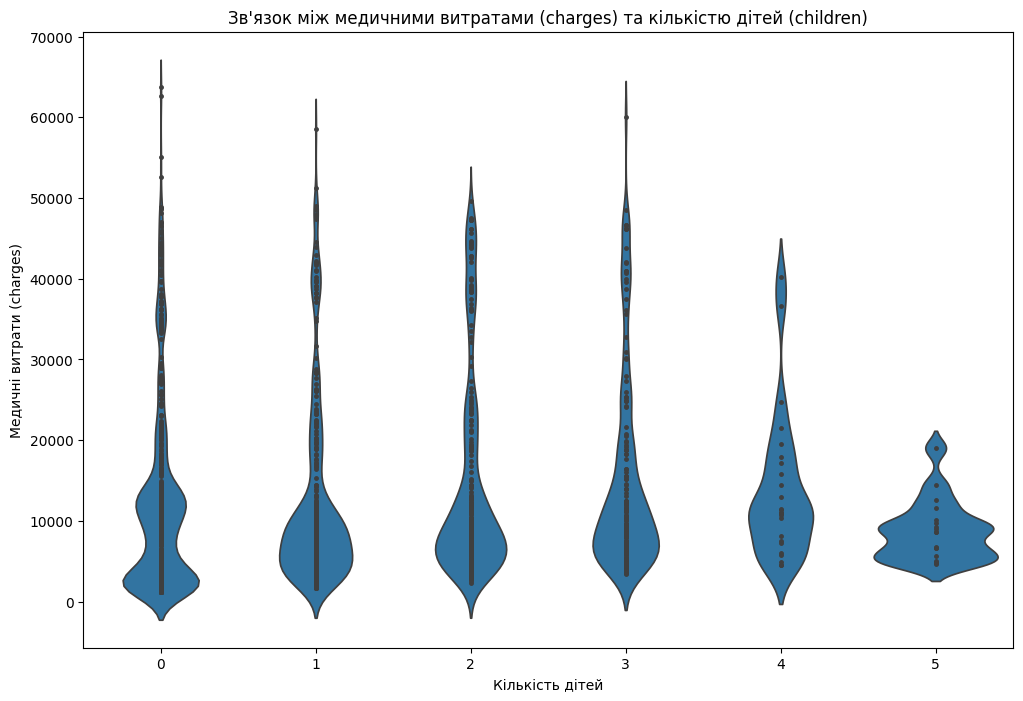

In [27]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.violinplot(
    data=medical_df,
    x='children',
    y='charges',
    inner='point',
    bw_adjust=0.5
)
plt.title('Зв\'язок між медичними витратами (charges) та кількістю дітей (children)')
plt.xlabel('Кількість дітей')
plt.ylabel('Медичні витрати (charges)')
plt.show()

0 дітей - найбільша варіативність у медичних витратах, включаючи дуже високі значення.
1–3 дітей - розподіл медичних витрат залишається досить схожим, з подібними піками у нижньому діапазоні витрат.
4–5 дітей - спостерігається зменшення варіативності. Високі медичні витрати менш поширені серед людей із більшою кількістю дітей.


Високі витрати (charges > 40 000) спостерігаються у всіх категоріях, але вони більш виражені серед пацієнтів без дітей або з невеликою кількістю дітей.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [28]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [29]:
def estimate_charges(age, w, b):
    return w * age + b

In [30]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

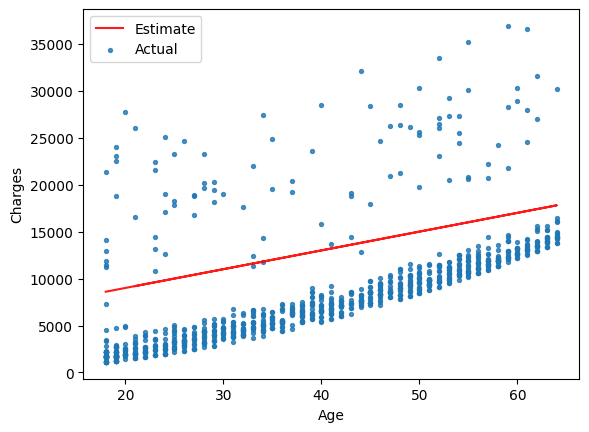

In [32]:
try_parameters(non_smoker_df, w=200, b=5000)

Лінія прогнозу має помірний нахил.

Прогнозовані значення charges нижчі за фактичні у старших пацієнтів.
Модель недооцінює медичні витрати для більшості вікових груп.
Висновок: Коефіцієнт нахилу w є недостатнім для точного прогнозу, а значення b - занижене.

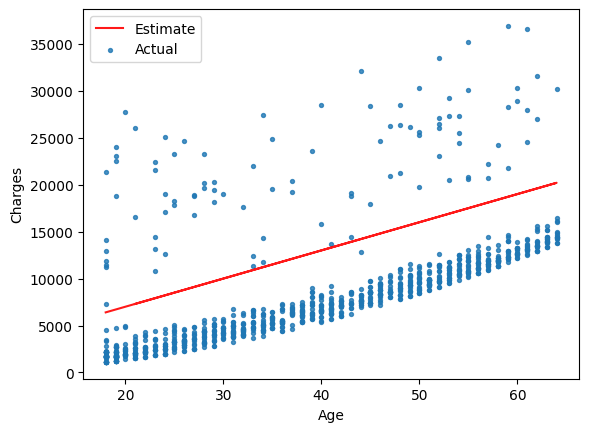

In [33]:
try_parameters(non_smoker_df, w=300, b=1000)

Нахил лінії стала більш крутим, прогнозовані витрати краще відповідають середньому тренду.
Лінія все ще недооцінює витрати у старших пацієнтів, але наближається до загальної тенденції.

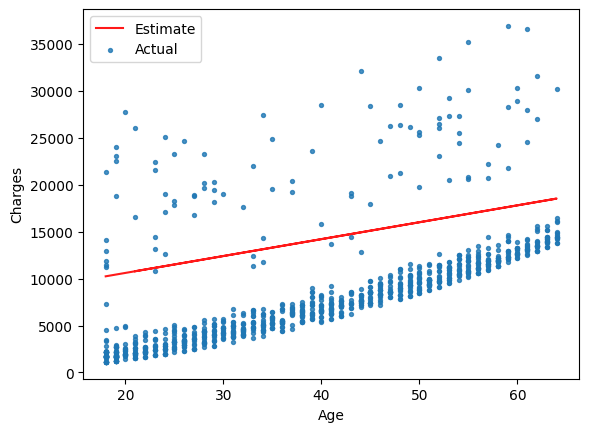

In [34]:
try_parameters(non_smoker_df, w=180, b=7000)

Лінія має менш крутий нахил, але починається з більш високого базового рівня витрат завдяки великому значенню b.
Модель краще відповідає нижньому віковому діапазону (до 30 років).
Для старших вікових груп модель недооцінює витрати.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [35]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  6509.498468654392


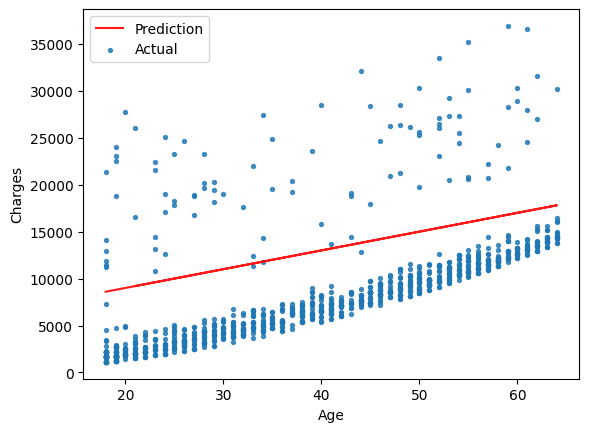

In [36]:
try_parameters(200, 5000)

RMSE Loss:  6414.638689603041


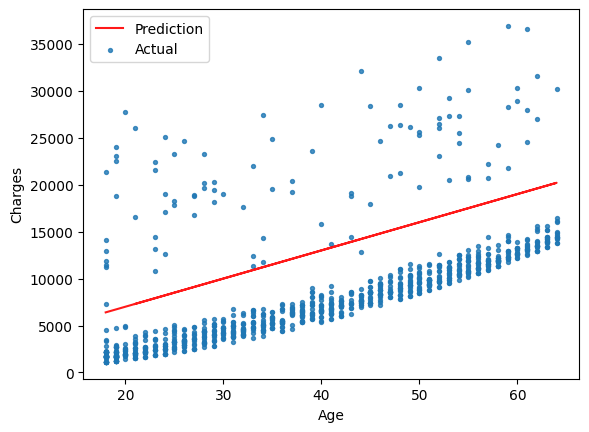

In [37]:
try_parameters(300, 1000)

RMSE Loss:  7431.5186823443


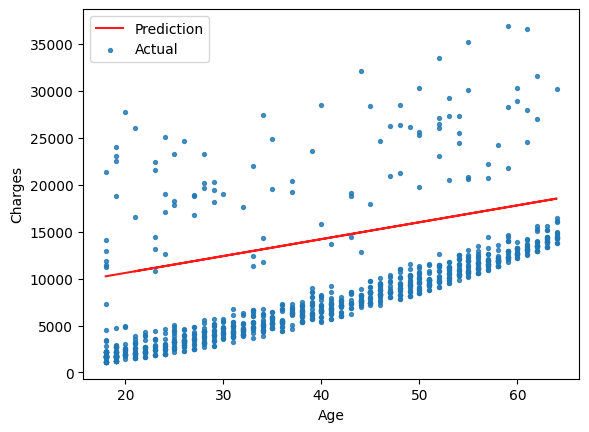

In [38]:
try_parameters(180, 7000)

Найменше значення RMSE було досягнуто для пари w=300, b=1000, що вказує на те, що ця лінійна модель краще відповідає даним, ніж інші. Високе значення RMSE = 7431.5186823443 - вказує на значну різницю між прогнозованими і фактичними значеннями, що може свідчити про нелінійний характер залежності між age і charges.

Стратегія:
Ручним способом (трудозатратним) пробувати різні діапазони для w та b, наприклад:

w: від 100 до 400 з кроком 50

b: від 1000 до 8000 з кроком 1000

Для кожної комбінації обчислюйте RMSE та вибирайте найнижче значення.

Після цього звузити діапазон найкращих значень та використовувати менший крок для точного підбору.

Надалі можна використовувати - метод найменших квадратів (краще для менших наборів даних) або Градієнтний спуск: (краще для більших наборів даних)